# Prophet 예측모델

## y(t)=g(t)+s(t)+h(t)+εt

17:36:52 - cmdstanpy - INFO - Chain [1] start processing
17:37:37 - cmdstanpy - INFO - Chain [1] done processing
/tmp/ipykernel_4208/1049765189.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
/tmp/ipykernel_4208/1049765189.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


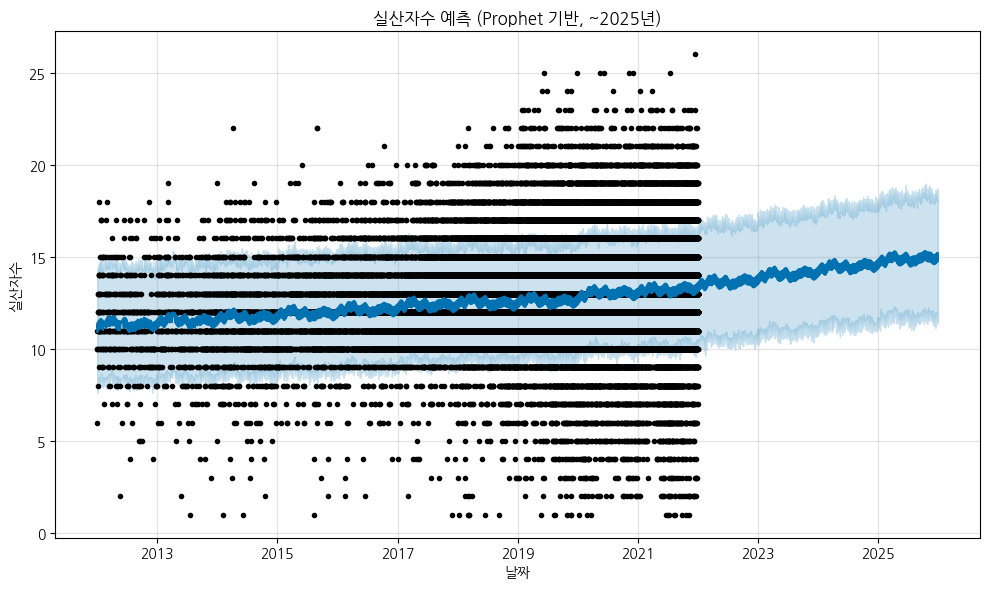

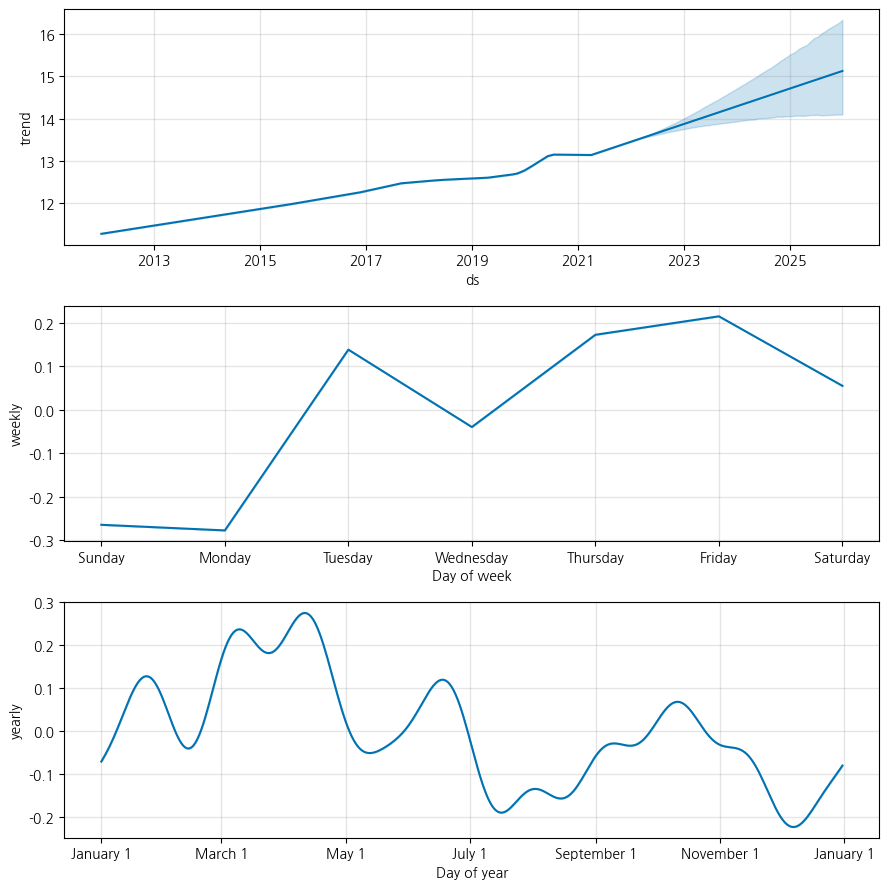

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 불러오기
df = pd.read_csv('../../data/pigmom_data/prophet_data.csv')

# 날짜 형식 변환
df['분만일'] = pd.to_datetime(df['분만일'], errors='coerce')

# 결측값 제거
df = df.dropna(subset=['분만일', '실산자수', '이유두수'])

# 예측할 대상 선택 ('실산자수' or '이유두수')
target_column = '실산자수'  # ← 여기서 예측 항목 변경 가능

# Prophet용 포맷으로 리네이밍
prophet_df = df[['분만일', target_column]].rename(columns={'분만일': 'ds', target_column: 'y'})

# Prophet 모델 생성 및 학습
model = Prophet()
model.fit(prophet_df)

# Create future dataframe until end of 2025
# last_date = prophet_df['ds'].max()
future = model.make_future_dataframe(periods=1460)  # ~2 years for coverage until 2025
forecast = model.predict(future)

# Filter forecast until end of 2025
forecast_2025 = forecast[forecast['ds'] <= '2025-12-31']

# Plot forecast
fig1 = model.plot(forecast_2025)
plt.title('실산자수 예측 (Prophet 기반, ~2025년)')
plt.xlabel('날짜')
plt.ylabel('실산자수')
plt.grid(True)
plt.tight_layout()
fig1.show()

# 구성요소 분해 시각화 (Trend, Seasonality 등)
fig2 = model.plot_components(forecast_2025)
fig2.show()

17:38:15 - cmdstanpy - INFO - Chain [1] start processing
17:39:06 - cmdstanpy - INFO - Chain [1] done processing
17:39:11 - cmdstanpy - INFO - Chain [1] start processing
17:39:51 - cmdstanpy - INFO - Chain [1] done processing


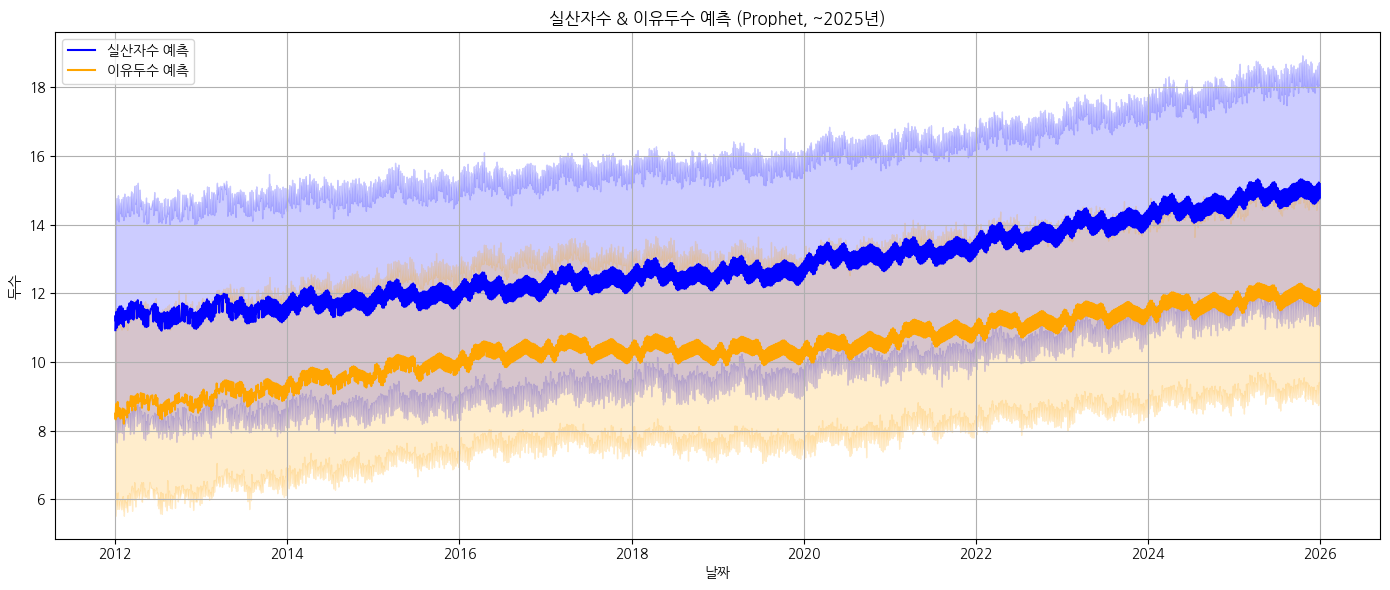

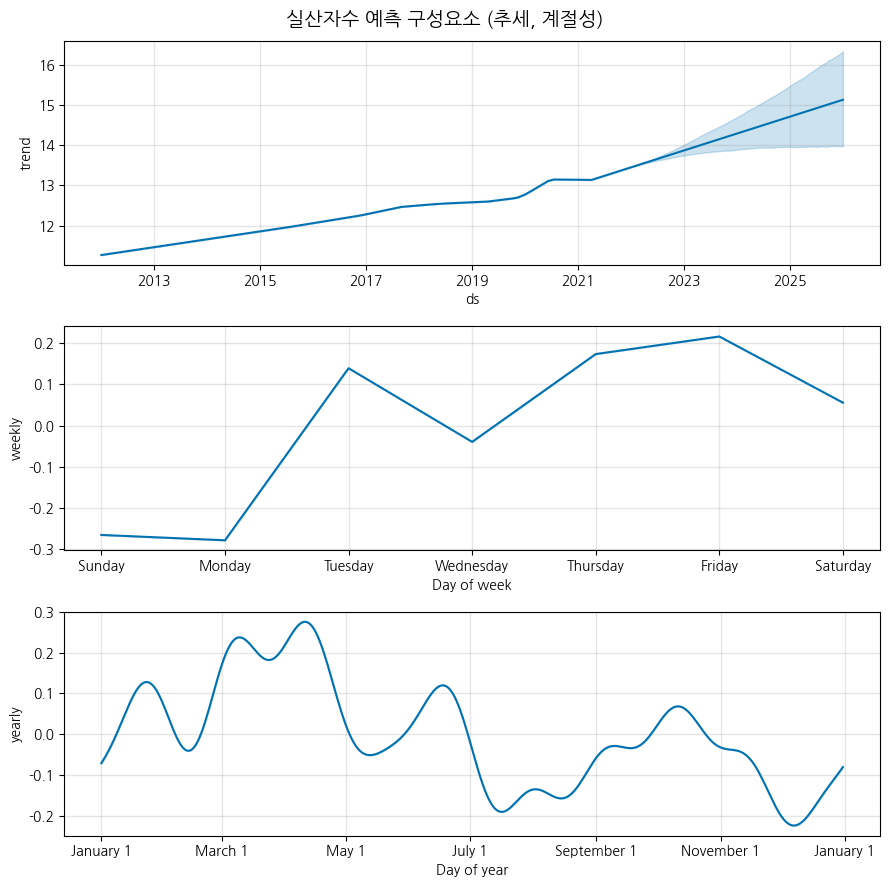

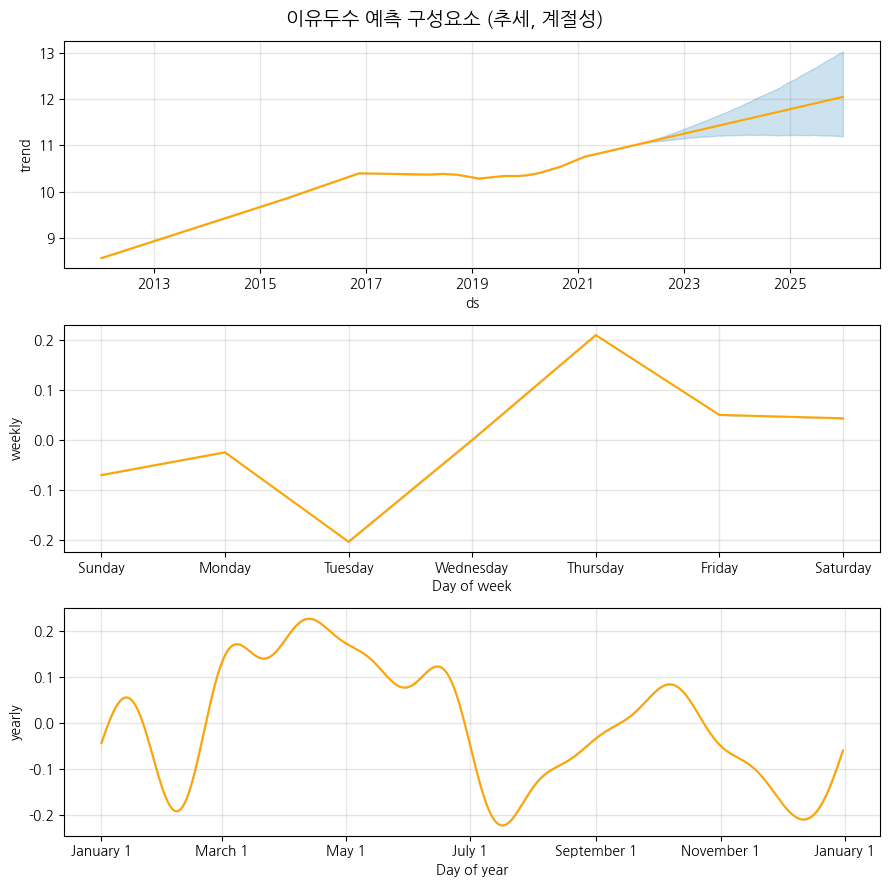

In [4]:
# --- 실산자수 Prophet 예측 ---
df_san = df[['분만일', '실산자수']].rename(columns={'분만일': 'ds', '실산자수': 'y'})
model_san = Prophet()
model_san.fit(df_san)
future_san = model_san.make_future_dataframe(periods=1460)
forecast_san = model_san.predict(future_san)
forecast_san = forecast_san[forecast_san['ds'] <= '2025-12-31']

# --- 이유두수 Prophet 예측 ---
df_iyu = df[['분만일', '이유두수']].rename(columns={'분만일': 'ds', '이유두수': 'y'})
model_iyu = Prophet()
model_iyu.fit(df_iyu)
future_iyu = model_iyu.make_future_dataframe(periods=1460)
forecast_iyu = model_iyu.predict(future_iyu)
forecast_iyu = forecast_iyu[forecast_iyu['ds'] <= '2025-12-31']

# --- 예측 결과 시각화 ---
plt.figure(figsize=(14, 6))
plt.plot(forecast_san['ds'], forecast_san['yhat'], label='실산자수 예측', color='blue')
plt.fill_between(forecast_san['ds'], forecast_san['yhat_lower'], forecast_san['yhat_upper'], color='blue', alpha=0.2)

plt.plot(forecast_iyu['ds'], forecast_iyu['yhat'], label='이유두수 예측', color='orange')
plt.fill_between(forecast_iyu['ds'], forecast_iyu['yhat_lower'], forecast_iyu['yhat_upper'], color='orange', alpha=0.2)

plt.title('실산자수 & 이유두수 예측 (Prophet, ~2025년)')
plt.xlabel('날짜')
plt.ylabel('두수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 실산자수 구성요소 분해 시각화 ---
fig_san = model_san.plot_components(forecast_san)
fig_san.suptitle('실산자수 예측 구성요소 (추세, 계절성)', fontsize=14)
fig_san.tight_layout()
plt.show()

# --- 이유두수 구성요소 분해 시각화 ---
fig_iyu = model_iyu.plot_components(forecast_iyu)
lines = fig_iyu.get_axes()
for ax in lines:
    for line in ax.get_lines():
        line.set_color('orange')  # 오렌지색으로 변경
fig_iyu.suptitle('이유두수 예측 구성요소 (추세, 계절성)', fontsize=14)
fig_iyu.tight_layout()
plt.show()

In [5]:
forecast_san.to_csv('../../data/pigmom_data/forecast_san.csv', index=False)

In [6]:
forecast_iyu.to_csv('../../data/pigmom_data/forecast_iyu.csv', index=False)

# PSY 구하기 과정

## 평균 실산자수 sql보내기

In [7]:
import pandas as pd

In [8]:
forecast_san = pd.read_csv("../../data/pigmom_data/forecast_san.csv")
forecast_san

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-02,11.273860,7.722346,14.095808,11.273860,11.273860,-0.346940,-0.346940,-0.346940,-0.278083,-0.278083,-0.278083,-0.068857,-0.068857,-0.068857,0.0,0.0,0.0,10.926920
1,2012-01-03,11.274395,8.317155,14.372236,11.274395,11.274395,0.078043,0.078043,0.078043,0.138805,0.138805,0.138805,-0.060762,-0.060762,-0.060762,0.0,0.0,0.0,11.352438
2,2012-01-04,11.274930,8.094300,14.533207,11.274930,11.274930,-0.091849,-0.091849,-0.091849,-0.039662,-0.039662,-0.039662,-0.052187,-0.052187,-0.052187,0.0,0.0,0.0,11.183080
3,2012-01-05,11.275465,8.287093,14.590243,11.275465,11.275465,0.129986,0.129986,0.129986,0.173079,0.173079,0.173079,-0.043093,-0.043093,-0.043093,0.0,0.0,0.0,11.405450
4,2012-01-06,11.276000,8.312535,14.638204,11.276000,11.276000,0.182194,0.182194,0.182194,0.215657,0.215657,0.215657,-0.033463,-0.033463,-0.033463,0.0,0.0,0.0,11.458193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2025-12-26,15.121385,11.960003,18.716030,13.972881,16.315217,0.101409,0.101409,0.101409,0.215657,0.215657,0.215657,-0.114248,-0.114248,-0.114248,0.0,0.0,0.0,15.222795
4801,2025-12-27,15.122533,11.682687,18.110605,13.972746,16.318958,-0.052300,-0.052300,-0.052300,0.055334,0.055334,0.055334,-0.107634,-0.107634,-0.107634,0.0,0.0,0.0,15.070233
4802,2025-12-28,15.123681,11.069685,18.069430,13.972611,16.322699,-0.366127,-0.366127,-0.366127,-0.265129,-0.265129,-0.265129,-0.100998,-0.100998,-0.100998,0.0,0.0,0.0,14.757553
4803,2025-12-29,15.124828,11.493796,18.109060,13.972476,16.326440,-0.372351,-0.372351,-0.372351,-0.278083,-0.278083,-0.278083,-0.094268,-0.094268,-0.094268,0.0,0.0,0.0,14.752477


In [9]:
forecast_iyu = pd.read_csv("../../data/pigmom_data/forecast_iyu.csv")
forecast_iyu

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-02,8.563600,5.747440,11.039393,8.563600,8.563600,-0.065449,-0.065449,-0.065449,-0.025336,-0.025336,-0.025336,-0.040112,-0.040112,-0.040112,0.0,0.0,0.0,8.498151
1,2012-01-03,8.564610,5.528663,10.944502,8.564610,8.564610,-0.231524,-0.231524,-0.231524,-0.204145,-0.204145,-0.204145,-0.027379,-0.027379,-0.027379,0.0,0.0,0.0,8.333086
2,2012-01-04,8.565620,5.901023,11.193089,8.565620,8.565620,-0.015757,-0.015757,-0.015757,-0.000738,-0.000738,-0.000738,-0.015019,-0.015019,-0.015019,0.0,0.0,0.0,8.549862
3,2012-01-05,8.566629,6.177352,11.568420,8.566629,8.566629,0.205823,0.205823,0.205823,0.209008,0.209008,0.209008,-0.003185,-0.003185,-0.003185,0.0,0.0,0.0,8.772453
4,2012-01-06,8.567639,5.838775,11.301641,8.567639,8.567639,0.057377,0.057377,0.057377,0.049406,0.049406,0.049406,0.007971,0.007971,0.007971,0.0,0.0,0.0,8.625016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2025-12-26,12.046165,9.419991,14.752963,11.196411,13.025730,-0.072957,-0.072957,-0.072957,0.049406,0.049406,0.049406,-0.122363,-0.122363,-0.122363,0.0,0.0,0.0,11.973208
4801,2025-12-27,12.046891,9.258471,14.670965,11.195909,13.027569,-0.067861,-0.067861,-0.067861,0.042644,0.042644,0.042644,-0.110505,-0.110505,-0.110505,0.0,0.0,0.0,11.979030
4802,2025-12-28,12.047617,9.089688,14.978627,11.195430,13.029408,-0.169030,-0.169030,-0.169030,-0.070839,-0.070839,-0.070839,-0.098191,-0.098191,-0.098191,0.0,0.0,0.0,11.878587
4803,2025-12-29,12.048343,9.129401,14.809969,11.194980,13.031246,-0.110860,-0.110860,-0.110860,-0.025336,-0.025336,-0.025336,-0.085523,-0.085523,-0.085523,0.0,0.0,0.0,11.937483


In [10]:
# 날짜 형식 변환
forecast_san['ds'] = pd.to_datetime(forecast_san['ds'])
forecast_iyu['ds'] = pd.to_datetime(forecast_iyu['ds'])

In [11]:
# 연도별 평균실산자수값 계산 (yhat, yhat_lower, yhat_upper 모두)
avg_san_by_year = forecast_san[
    (forecast_san['ds'].dt.year >= 2012) & 
    (forecast_san['ds'].dt.year <= 2025)
].groupby(forecast_san['ds'].dt.year)[['yhat', 'yhat_lower', 'yhat_upper']].mean().reset_index()

avg_san_by_year.columns = ['year', 'avg_yhat', 'avg_yhat_lower', 'avg_yhat_upper']

In [12]:
# 연도별 평균이유두수값 계산 (yhat, yhat_lower, yhat_upper 모두)
avg_iyu_by_year = forecast_iyu[
    (forecast_iyu['ds'].dt.year >= 2012) & 
    (forecast_iyu['ds'].dt.year <= 2025)
].groupby(forecast_iyu['ds'].dt.year)[['yhat', 'yhat_lower', 'yhat_upper']].mean().reset_index()

avg_iyu_by_year.columns = ['year', 'avg_yhat', 'avg_yhat_lower', 'avg_yhat_upper']

In [14]:
avg_san_by_year

,year,avg_yhat,avg_yhat_lower,avg_yhat_upper
0,2012,11.375060,8.237404,14.529039
1,2013,11.568315,8.434457,14.729264
2,2014,11.762491,8.616868,14.920246
3,2015,11.964929,8.809454,15.103875
4,2016,12.170892,9.023335,15.317362
5,2017,12.414018,9.259561,15.562162
6,2018,12.549140,9.400978,15.685794
7,2019,12.643202,9.496631,15.798885
8,2020,13.055111,9.899064,16.200808
9,2021,13.255453,10.107018,16.402807


In [15]:
avg_iyu_by_year

,year,avg_yhat,avg_yhat_lower,avg_yhat_upper
0,2012,8.753099,6.079517,11.423135
1,2013,9.122924,6.458411,11.798371
2,2014,9.496268,6.819058,12.172983
3,2015,9.865917,7.200770,12.541028
4,2016,10.249672,7.578286,12.919768
5,2017,10.383393,7.702071,13.063549
6,2018,10.365390,7.690700,13.045080
7,2019,10.321161,7.647759,12.986550
8,2020,10.496301,7.828518,13.169222
9,2021,10.856004,8.181465,13.531477


### 평균실산자수 table 생성

In [16]:
import mysql.connector

# MySQL 연결
remote = mysql.connector.connect(
    host = "database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "root",
    password = "49841637ok",
    database = "pig"
)

In [17]:
cur = remote.cursor()

In [18]:
create_table = '''
CREATE TABLE IF NOT EXISTS avg_san (
    id INT AUTO_INCREMENT PRIMARY KEY,
    year INT,
    avg_yhat FLOAT,
    avg_yhat_lower FLOAT,
    avg_yhat_upper FLOAT
)
'''

In [19]:
cur.execute(create_table)

In [20]:
remote.commit()

In [21]:
# 데이터 삽입
for _, row in avg_san_by_year.iterrows():
    year = int(row['year'])
    yhat = float(row['avg_yhat'])
    lower = float(row['avg_yhat_lower'])
    upper = float(row['avg_yhat_upper'])

    insert_query = '''
        INSERT INTO avg_san (year, avg_yhat, avg_yhat_lower, avg_yhat_upper)
        VALUES (%s, %s, %s, %s)
    '''
    cur.execute(insert_query, (year, yhat, lower, upper))

# 저장
remote.commit()

In [22]:
# 종료
cur.close()
remote.close()

### 평균이유두수 table 생성

In [23]:
import mysql.connector

# MySQL 연결
remote = mysql.connector.connect(
    host = "database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "root",
    password = "49841637ok",
    database = "pig"
)

In [24]:
cur = remote.cursor()

In [25]:
create_table = '''
CREATE TABLE IF NOT EXISTS avg_iyu (
    id INT AUTO_INCREMENT PRIMARY KEY,
    year INT,
    avg_yhat FLOAT,
    avg_yhat_lower FLOAT,
    avg_yhat_upper FLOAT
)
'''

In [26]:
cur.execute(create_table)

In [27]:
remote.commit()

In [28]:
# 데이터 삽입
for _, row in avg_iyu_by_year.iterrows():
    year = int(row['year'])
    yhat = float(row['avg_yhat'])
    lower = float(row['avg_yhat_lower'])
    upper = float(row['avg_yhat_upper'])

    insert_query = '''
        INSERT INTO avg_iyu (year, avg_yhat, avg_yhat_lower, avg_yhat_upper)
        VALUES (%s, %s, %s, %s)
    '''
    cur.execute(insert_query, (year, yhat, lower, upper))

# 저장
remote.commit()

In [30]:
# 종료
cur.close()
remote.close()

In [ ]:
merged_df = pd.merge(avg_iyu_by_year, avg_san_by_year, on = 'year')

In [33]:
merged_df

,year,avg_yhat_x,avg_yhat_lower_x,avg_yhat_upper_x,avg_yhat_y,avg_yhat_lower_y,avg_yhat_upper_y
0,2012,8.753099,6.079517,11.423135,11.375060,8.237404,14.529039
1,2013,9.122924,6.458411,11.798371,11.568315,8.434457,14.729264
2,2014,9.496268,6.819058,12.172983,11.762491,8.616868,14.920246
3,2015,9.865917,7.200770,12.541028,11.964929,8.809454,15.103875
4,2016,10.249672,7.578286,12.919768,12.170892,9.023335,15.317362
5,2017,10.383393,7.702071,13.063549,12.414018,9.259561,15.562162
6,2018,10.365390,7.690700,13.045080,12.549140,9.400978,15.685794
7,2019,10.321161,7.647759,12.986550,12.643202,9.496631,15.798885
8,2020,10.496301,7.828518,13.169222,13.055111,9.899064,16.200808
9,2021,10.856004,8.181465,13.531477,13.255453,10.107018,16.402807


In [35]:
merged_df['육성율(%)'] = (merged_df['avg_yhat_x'] / merged_df['avg_yhat_y']) * 100

In [36]:
merged_df

,year,avg_yhat_x,avg_yhat_lower_x,avg_yhat_upper_x,avg_yhat_y,avg_yhat_lower_y,avg_yhat_upper_y,육성율(%)
0,2012,8.753099,6.079517,11.423135,11.375060,8.237404,14.529039,76.949914
1,2013,9.122924,6.458411,11.798371,11.568315,8.434457,14.729264,78.861305
2,2014,9.496268,6.819058,12.172983,11.762491,8.616868,14.920246,80.733476
3,2015,9.865917,7.200770,12.541028,11.964929,8.809454,15.103875,82.456960
4,2016,10.249672,7.578286,12.919768,12.170892,9.023335,15.317362,84.214636
5,2017,10.383393,7.702071,13.063549,12.414018,9.259561,15.562162,83.642483
6,2018,10.365390,7.690700,13.045080,12.549140,9.400978,15.685794,82.598407
7,2019,10.321161,7.647759,12.986550,12.643202,9.496631,15.798885,81.634080
8,2020,10.496301,7.828518,13.169222,13.055111,9.899064,16.200808,80.399939
9,2021,10.856004,8.181465,13.531477,13.255453,10.107018,16.402807,81.898403


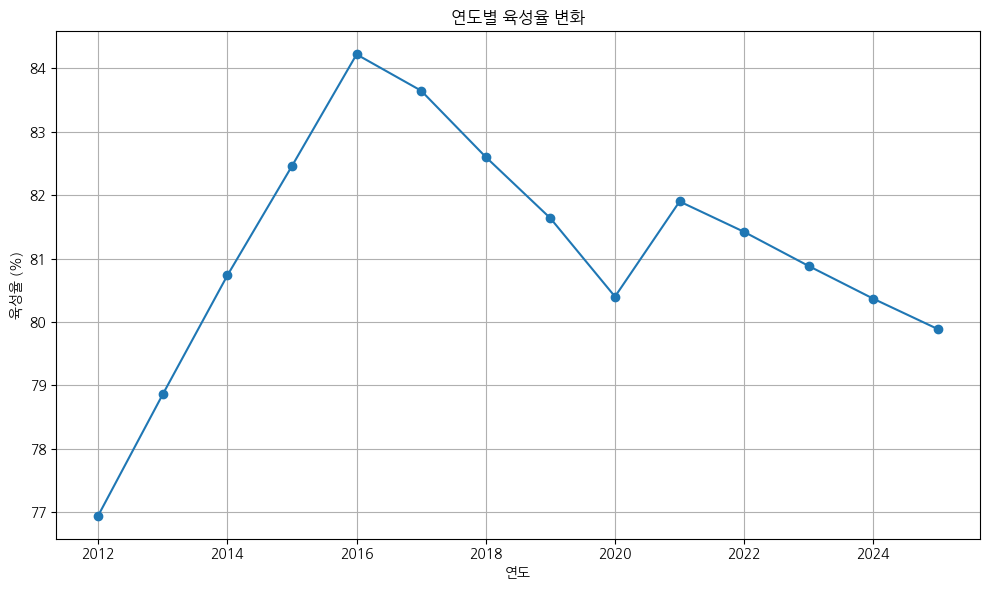

In [37]:
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(merged_df['year'], merged_df['육성율(%)'], marker='o')
plt.title('연도별 육성율 변화')
plt.xlabel('연도')
plt.ylabel('육성율 (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

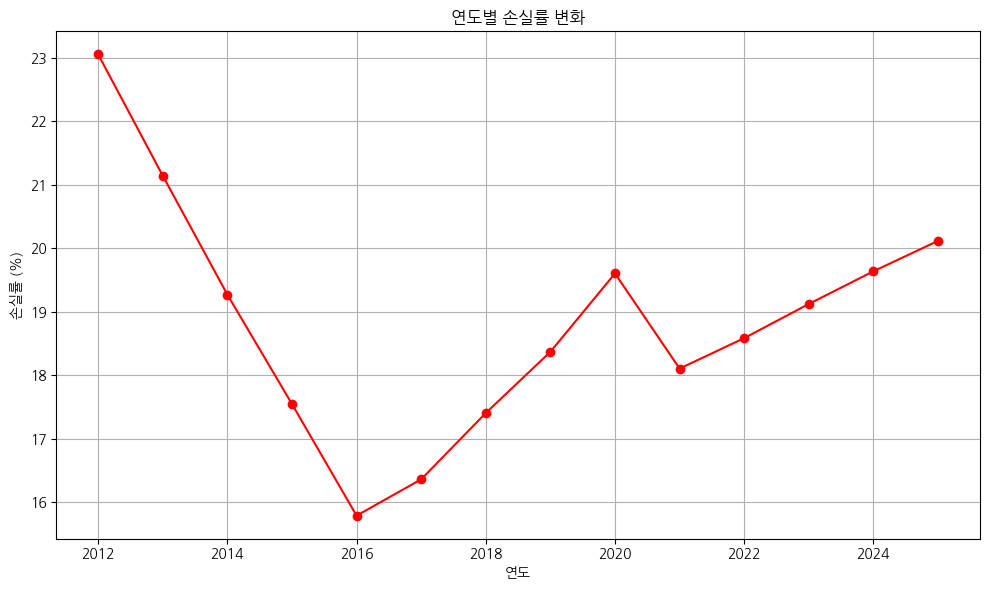

In [41]:
# 손실률 계산 및 추가
merged_df['손실률(%)'] = 100 - merged_df['육성율(%)']

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(merged_df['year'], merged_df['손실률(%)'], marker='o', color = 'red')
plt.title('연도별 손실률 변화')
plt.xlabel('연도')
plt.ylabel('손실률 (%)')
plt.grid(True)
plt.tight_layout()
plt.show()